In [81]:
import pandas as pd
import numpy as np

In [109]:
df_original = pd.read_csv("2017_Migrant_A_desensitized2017_Migrant_A_desensitized.csv", encoding="GBK").replace("",np.nan)
df_original[:5]

,newID,C1,C2,C3,C6,C7,C14,Q100,q101id1,q101a1,...,Q504C2,Q504D1,Q504D2,Q504E1,Q504E2,Q505,Q506,pcode,hjpro,w_l
0,105603,广东省,深圳市,光明新区,5281,居委会,5281,4,1,本人,...,本地,否,NaN,否,NaN,已经办理,1,44,36,6.719342
1,105619,广东省,深圳市,光明新区,5281,居委会,5281,3,1,本人,...,NaN,是,本地,否,NaN,已经办理,1,44,36,10.147591
2,73661,福建省,厦门市,同安区,3684,居委会,3684,4,1,本人,...,NaN,是,本地,否,NaN,已经办理,1,35,51,1.355456
3,168796,新疆生产建设兵团,第六师,军户农场,8440,居委会,8440,3,1,本人,...,本地,否,NaN,否,NaN,已经办理,2,66,65,0.157172
4,1718,北京市,北京市,朝阳区,86,居委会,86,2,1,本人,...,NaN,是,本地,否,NaN,已经办理,1,11,51,1.585694


In [198]:
df = df_original.copy()
print(", ".join(df.columns))

newID, C1, C2, C3, C6, C7, C14, Q100, q101id1, q101a1, q101b1, q101c1y, q101c1m, q101d1, q101e1, q101f1, q101g1, q101h1, q101i1, q101j1a, q101j1b, q101k1, q101l1, q101m1y, q101m1m, q101n1, q101id2, q101a2, q101b2, q101c2y, q101c2m, q101d2, q101e2, q101f2, q101g2, q101h2, q101i2, q101j2a, q101j2b, q101k2, q101l2, q101m2y, q101m2m, q101n2, q101id3, q101a3, q101b3, q101c3y, q101c3m, q101d3, q101e3, q101f3, q101g3, q101h3, q101i3, q101j3a, q101j3b, q101k3, q101l3, q101m3y, q101m3m, q101n3, q101id4, q101a4, q101b4, q101c4y, q101c4m, q101d4, q101e4, q101f4, q101g4, q101h4, q101i4, q101j4a, q101j4b, q101k4, q101l4, q101m4y, q101m4m, q101n4, q101id5, q101a5, q101b5, q101c5y, q101c5m, q101d5, q101e5, q101f5, q101g5, q101h5, q101i5, q101j5a, q101j5b, q101k5, q101l5, q101m5y, q101m5m, q101n5, q101id6, Q102, Q102A, Q102B, Q103, Q104, Q105, Q106, Q106A, Q106B, Q107, Q108A, Q108B, Q109, Q109A, Q110, Q110A, Q111, Q112, Q201, Q201A, Q202, Q203Y, Q203M, Q204, Q205, Q206, Q207, Q208, Q209, Q210Y, Q210M,

#### Filling out the forms by themselves?

In [199]:
df["q101i1"].unique()

array(['否'], dtype=object)

#### Preselection of the study cohort
1. Ethnicity: Han
2. Migrated by themselves

In [200]:
df = df[(df.q101d1=="汉")&(df.Q305A=="是")]
len(df)

65432

#### Has local kids

In [201]:
df["Q316"].value_counts()

个人发展空间大        12454
子女有更好的教育机会     10950
收入水平高           7769
积累工作经验          4938
家人习惯本地生活        4467
城市交通发达、生活方便     4464
与本地人结婚          3856
其他              2909
社会关系网都在本地       2391
政府管理规范           321
医疗技术好            276
Name: Q316, dtype: int64

In [202]:
df["q101h1"].value_counts()

初婚    47419
未婚    13702
离婚     1805
再婚     1426
丧偶      578
同居      502
Name: q101h1, dtype: int64

In [203]:
df["has_local_child"] = 0
df["has_local_child"] = np.where((df['Q316']=='子女有更好的教育机会')&((df['q101h1']=="离婚")|(df['q101h1']=="丧偶")), np.nan, 0)
df["has_local_child"] = np.where((df['Q316']=='子女有更好的教育机会')&((df['q101h1']=="初婚")|(df['q101h1']=="再婚")|(df['q101h1']=="同居")), 1, 0)
df.has_local_child.value_counts()

0    54753
1    10679
Name: has_local_child, dtype: int64

#### How many coities have you migrated to?

<AxesSubplot:>

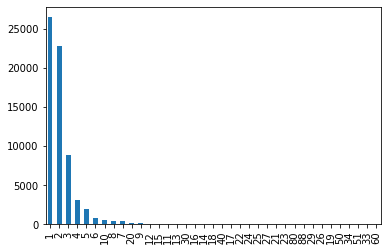

In [204]:
df["Q307"].value_counts().plot(kind="bar")

#### House rental status 

In [205]:
df["Q308"].value_counts()

租住私房-整租            27491
自购商品房              15266
单位/雇主房（不包括就业场所）     8245
租住私房-合租             7029
就业场所                1651
自建房                 1567
自购小产权住房             1303
借住房                 1052
政府提供公租房              777
自购保障性住房              772
其他非正规居所              279
Name: Q308, dtype: int64

In [206]:
ownership = ["自购小产权住房","自建房","自购保障性住房"]
rental = ["租住私房-整租","租住私房-合租","政府提供公租房","借住房","就业场所","单位/雇主房（不包括就业场所）"]
no_housing = ["其他非正规居所"]
def map_housing(x):
    if x in ownership:
        return "ownership"
    elif x in rental or x in no_housing:
        return "no ownership"
    else:
        return np.nan
    
df["housing_type"] = df["Q308"].apply(lambda x: map_housing(x))

In [207]:
df.housing_type.value_counts()

no ownership    46524
ownership        3642
Name: housing_type, dtype: int64

#### Migration type

In [208]:
df["Q301"].value_counts()

农村      47376
乡镇       7821
县城       5697
地级市      3211
省会城市      990
直辖市       337
Name: Q301, dtype: int64

In [209]:
df["from_rural"] = np.where(df["Q301"]=="农村", 1, 0)
df.from_rural.value_counts()

1    47376
0    18056
Name: from_rural, dtype: int64

In [210]:
def map502(x):
    if "经常" in x:
        return 3
    elif "有时" in x:
        return 2
    elif "偶尔" in x:
        return 1
    elif "没有" in x:
        return 0
    else:
        return np.nan
df["Q502"] = df["Q502A"].apply(lambda x: map502(x))+df["Q502B"].apply(lambda x: map502(x))+df["Q502C"].apply(lambda x: map502(x))

In [211]:
df.Q502D = df.Q502D.apply(lambda x: map502(x))
df.Q502E = df.Q502E.apply(lambda x: map502(x))

#### Keep only selected attributes and replace strings with values

In [212]:
df.Q309.unique()

array(['其他外地人', '其他本地人', '同乡（户口仍在老家）', '很少与人来往', '同乡（户口迁至本地与老家以来的其他地区）',
       '同乡（户口迁至本地）', '21'], dtype=object)

In [213]:
import numpy as np
d = {"经常": 4,
     "有时": 3,
     "偶尔": 2,
     "没有":1,
     '完全同意':2,
     '基本同意':1,
     '不同意':-1,
     '完全不同意':-2,
     "不清楚": np.nan,
     "女":"female",
     "男":"male",
     '未上过小学':"no education",
     '小学':"primary school",
     '初中':"midschool", 
     '高中/中专':"highschool",
     '大学专科':"junior college",
     '大学本科':"college",
     '研究生':"grad",
     '女':"female",
     '男':"male",
#      '未婚':"unmarried",
#      '同居':"living together",
#      '初婚':"just married",
#      '再婚':"remarried", 
#      '离婚':"divorced",
#      '丧偶':"widowed",
     '未婚':0,
     '同居':1,
     '初婚':1,
     '再婚':1, 
     '离婚':0,
     '丧偶':0,
     '均未患有':0, 
     '未就诊':np.nan, 
     '患有糖尿病':"db", 
     '患有高血压和糖尿病':"db+hpt", 
     '患有高血压':"hpt",
     '健康': 4, 
     '基本健康': 3, 
     '不健康，但生活能自理': 2, 
     '生活不能自理': 1,
     '是，最近一次发生在两周前': "within 2 weeks", 
     '是，最近一次发生在两周内': "before 2 weeks",
     '跨省':"interstate",
     '省内跨市':"intercity", 
     '市内跨县':"intercounty",
     '有固定雇主的雇员':"stable job",
     '雇主':"stable job", 
     '自营劳动者':"stable job", 
     '其他':"other",
     '无固定雇主的雇员（零工、散工等）':"unstable job",
     '愿意':"yes", 
     '不愿意':"no", 
     '是':1,
#      '没想好':"don't know", 
#      '否':-1,
#      '6-10年': "6-10 yrs", 
#      '定居': "settle down",
#      '10年以上': ">10 yrs", 
#      '3-5年': "3-5 yrs",
#      '1-2年': "1-2 yrs",
     '没想好':np.nan, 
     '否':0,
     '6-10年': 3, 
     '定居': 5,
     '10年以上': 4, 
     '3-5年':2,
     '1-2年': 1,
     '其他外地人': "with other foreiners", 
     '其他本地人': "with other natives",
     '很少与人来往': "don't hangout often",
     '同乡（户口仍在老家）': "people from same place", 
     '同乡（户口迁至本地）': "people from same place",
     '同乡（户口迁至本地与老家以来的其他地区）': "people from same place"
    }

In [214]:
df.columns

Index(['newID', 'C1', 'C2', 'C3', 'C6', 'C7', 'C14', 'Q100', 'q101id1',
       'q101a1',
       ...
       'Q504E2', 'Q505', 'Q506', 'pcode', 'hjpro', 'w_l', 'has_local_child',
       'housing_type', 'from_rural', 'Q502'],
      dtype='object', length=302)

In [215]:
df = df[["Q501A","Q501B","Q501C","Q501D","Q501E","Q501F",
         'q101e1',"q101k1","q101l1","q101b1","q101c1y",'q101d1','q101h1',
         'has_local_child', 'housing_type', 'from_rural',
         "Q104",'Q105',
         'Q201', "Q208",
         'Q305A','Q305B','Q305C','Q305D','Q305E','Q305F','Q305G','Q305H',
         "Q309", "Q313", "Q314", "Q315",
         'Q406','Q410',
         "Q502","Q502D","Q502E",
         "Q503A","Q503D","Q503E", "Q503F", "Q503H",
         'Q504A1','Q504A2','Q504B1','Q504B2','Q504C1','Q504C2','Q504D1','Q504D2','Q504E1','Q504E2']]

In [216]:
def replace(x):
    for k,v in d.items():
        if x == k:
            return v
    return x
df=df.applymap(lambda x: replace(x))
df[:5]

,Q501A,Q501B,Q501C,Q501D,Q501E,Q501F,q101e1,q101k1,q101l1,q101b1,...,Q504A1,Q504A2,Q504B1,Q504B2,Q504C1,Q504C2,Q504D1,Q504D2,Q504E1,Q504E2
0,0,0,0,0,0,0,highschool,本地,interstate,female,...,0.0,NaN,0.0,NaN,1.0,本地,0.0,NaN,0.0,NaN
2,0,0,1,0,0,1,highschool,本地,interstate,female,...,0.0,NaN,0.0,NaN,0.0,NaN,1.0,本地,0.0,NaN
4,0,0,0,0,0,0,junior college,本地,interstate,female,...,0.0,NaN,0.0,NaN,0.0,NaN,1.0,本地,0.0,NaN
6,0,1,0,0,0,0,highschool,本地,interstate,female,...,1.0,户籍地,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
12,0,0,1,1,0,0,highschool,本地,intercity,female,...,1.0,户籍地,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [217]:
df.Q314 = df.Q314.replace(1,np.nan).replace(-1,"no").fillna(df.Q315)
df.Q314.unique()

array([ 3.,  5., nan,  4.,  1.,  0.,  2.])

#### Age

In [227]:
df["q101c1y"] = 2017 - df["q101c1y"]
df["q101c1y"].unique()

array([28, 31, 33, 32, 38, 52, 43, 41, 29, 37, 45, 47, 26, 42, 25, 39, 40,
       36, 67, 53, 54, 19, 50, 30, 22, 44, 63, 21, 23, 59, 65, 20, 17, 61,
       24, 35, 55, 60, 76, 70, 75, 51, 62, 18, 66, 49, 27, 58, 46, 73, 64,
       69, 16, 57, 72, 48, 71, 81, 34, 74, 79, 77, 78, 68, 56, 89, 80, 82,
       83, 86, 85, 87, 15, 84, 88])

In [229]:
def map_age(x):
    if 15<=x<=22:
        return "15-22"
    elif 23<=x<=64:
        return "23-64"
    elif x>=65:
        return ">=65"
    else:
        return np.nan
df["age_group"] = df["q101c1y"].apply(lambda x: map_age(x))
df.age_group.value_counts()    

23-64    60621
15-22     4125
>=65       686
Name: age_group, dtype: int64

#### Deal with bounding and bridging

In [219]:
df["Q501_bridging"] = df.transpose()[:2].sum().transpose().apply(lambda x: 1 if x>0 else 0)
df["Q501_bounding"] = df.transpose()[2:5].sum().transpose().apply(lambda x: 1 if x>0 else 0)
df["Q501_other"] = df.transpose()[5:6].sum().transpose().apply(lambda x: 1 if x>0 else 0)

#### If 502D and E are not null, count this individual as in bridging groups

In [230]:
df.Q502D.unique()

array([1, 0, 2, 3])

In [231]:
df.Q502D = df.Q502D.apply(lambda x: 1 if x >=1 else np.nan)
df.Q502E = df.Q502E.apply(lambda x: 1 if x >=1 else np.nan)

In [232]:
df["Q501_bridging"] = df["Q501_bridging"].replace(0,np.nan)
df["Q501_bridging"] = df["Q501_bridging"].fillna(df.Q502D).fillna(df.Q502E).replace(np.nan, 0)
df["Q501_bridging"]

0         1.0
2         1.0
4         0.0
6         1.0
12        1.0
         ... 
169978    1.0
169979    1.0
169980    1.0
169985    1.0
169987    1.0
Name: Q501_bridging, Length: 65432, dtype: float64

In [233]:
df["Q501_bridging"].unique()

array([1., 0.])

In [234]:
df["Q501"] = [" "]*len(df)
df["Q501"] [(df.Q501_bridging==1)&(df.Q501_bounding==1)] = "both"
df["Q501"] [(df.Q501==" ")&(df.Q501_bounding==1)] = "bounding"
df["Q501"] [(df.Q501==" ")&(df.Q501_bridging==1)] = "bridging"
df["Q501"] [(df.Q501==" ")&(df.Q501_other==1)] = "other"
df["Q501"] = df["Q501"].replace(" ","no group")

<ipython-input-234-41998c913e07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q501"] [(df.Q501_bridging==1)&(df.Q501_bounding==1)] = "both"
<ipython-input-234-41998c913e07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q501"] [(df.Q501==" ")&(df.Q501_bounding==1)] = "bounding"
<ipython-input-234-41998c913e07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q501"] [(df.Q501==" ")&(df.Q501_bridging==1)] = "bridging"
<

In [235]:
df["Q504"] = df['Q504A1'].astype(float)+df['Q504B1'].astype(float)+df['Q504C1'].astype(float)+df['Q504D1'].astype(float)+df['Q504E1'].astype(float)
df["Q504"] = df["Q504"].apply(lambda x: 1 if x>0 else 0).astype(int)
df[:5]

,Q501A,Q501B,Q501C,Q501D,Q501E,Q501F,q101e1,q101k1,q101l1,q101b1,...,Q504D1,Q504D2,Q504E1,Q504E2,Q501_bridging,Q501_bounding,Q501_other,age_group,Q501,Q504
0,0,0,0,0,0,0,highschool,本地,interstate,female,...,0.0,NaN,0.0,NaN,1.0,0,0,23-64,bridging,1
2,0,0,1,0,0,1,highschool,本地,interstate,female,...,1.0,本地,0.0,NaN,1.0,1,1,23-64,both,1
4,0,0,0,0,0,0,junior college,本地,interstate,female,...,1.0,本地,0.0,NaN,0.0,0,0,23-64,no group,1
6,0,1,0,0,0,0,highschool,本地,interstate,female,...,NaN,NaN,0.0,NaN,1.0,0,0,23-64,bridging,0
12,0,0,1,1,0,0,highschool,本地,intercity,female,...,0.0,NaN,0.0,NaN,1.0,1,0,23-64,both,1


In [236]:
# df["Q305_type1"] = df[['Q305A']].replace(np.nan,0)
# df["Q305_type1"].unique()



In [237]:
# df["q305_2"]=df[['Q305B','Q305C','Q305D','Q305E','Q305F']].replace(np.nan,0).sum(axis=1)
# df["Q305_type2"] = df["q305_2"].apply(lambda x: 1 if x>0 else 0)
# df["Q305_type2"].unique()


In [238]:
# df["q305_2"]=df[['Q305G','Q305H']].replace(np.nan,0).sum(axis=1)
# df["Q305_type3"] = df["q305_2"].apply(lambda x: 1 if x>0 else 0)
# df["Q305_type3"].unique()
# df = df.drop("q305_2",axis=1)

In [239]:
df.sample(10)

,Q501A,Q501B,Q501C,Q501D,Q501E,Q501F,q101e1,q101k1,q101l1,q101b1,...,Q504D1,Q504D2,Q504E1,Q504E2,Q501_bridging,Q501_bounding,Q501_other,age_group,Q501,Q504
137682,0,0,1,1,1,0,highschool,本地,intercity,male,...,0.0,NaN,0.0,NaN,1.0,1,0,23-64,both,1
159699,0,0,0,0,0,0,highschool,本地,interstate,female,...,1.0,本地,0.0,NaN,0.0,0,0,23-64,no group,1
29685,0,0,0,0,0,0,midschool,本地,intercounty,female,...,0.0,NaN,0.0,NaN,0.0,0,0,23-64,no group,1
55225,0,0,1,1,0,0,highschool,本地,interstate,male,...,1.0,本地,0.0,NaN,0.0,1,0,23-64,bounding,1
60642,0,0,1,1,0,0,midschool,本地,interstate,male,...,0.0,NaN,0.0,NaN,0.0,1,0,23-64,bounding,1
85635,0,0,1,0,0,0,midschool,本地,intercity,male,...,0.0,NaN,0.0,NaN,1.0,1,0,23-64,both,1
93961,0,0,1,1,0,0,highschool,本地,intercity,female,...,0.0,NaN,0.0,NaN,0.0,1,0,23-64,bounding,1
57995,0,0,0,0,0,0,midschool,本地,intercounty,male,...,0.0,NaN,0.0,NaN,1.0,0,0,23-64,bridging,1
115615,1,1,0,0,0,0,college,本地,intercounty,female,...,1.0,本地,0.0,NaN,1.0,0,0,23-64,bridging,1
129735,0,0,0,0,0,0,junior college,本地,interstate,male,...,0.0,NaN,0.0,NaN,0.0,0,0,23-64,no group,1


In [240]:
df = df.reset_index()
df.insert(0,"participant",df["index"].astype(str))
df[:5]

,participant,index,Q501A,Q501B,Q501C,Q501D,Q501E,Q501F,q101e1,q101k1,...,Q504D1,Q504D2,Q504E1,Q504E2,Q501_bridging,Q501_bounding,Q501_other,age_group,Q501,Q504
0,0,0,0,0,0,0,0,0,highschool,本地,...,0.0,NaN,0.0,NaN,1.0,0,0,23-64,bridging,1
1,2,2,0,0,1,0,0,1,highschool,本地,...,1.0,本地,0.0,NaN,1.0,1,1,23-64,both,1
2,4,4,0,0,0,0,0,0,junior college,本地,...,1.0,本地,0.0,NaN,0.0,0,0,23-64,no group,1
3,6,6,0,1,0,0,0,0,highschool,本地,...,NaN,NaN,0.0,NaN,1.0,0,0,23-64,bridging,0
4,12,12,0,0,1,1,0,0,highschool,本地,...,0.0,NaN,0.0,NaN,1.0,1,0,23-64,both,1


In [241]:
# df["Q401"] = df_original["Q401"]
# d = dict(zip(['健康', '基本健康', '不健康，但生活能自理', '生活不能自理'],[4,3,2,1]))
# for k,v in d.items():
#     df["Q401"] = df["Q401"].replace(k,v)
# df.groupby("Q401").agg("count")

In [242]:
print(", ".join(df.columns))

participant, index, Q501A, Q501B, Q501C, Q501D, Q501E, Q501F, q101e1, q101k1, q101l1, q101b1, q101c1y, q101d1, q101h1, has_local_child, housing_type, from_rural, Q104, Q105, Q201, Q208, Q305A, Q305B, Q305C, Q305D, Q305E, Q305F, Q305G, Q305H, Q309, Q313, Q314, Q315, Q406, Q410, Q502, Q502D, Q502E, Q503A, Q503D, Q503E, Q503F, Q503H, Q504A1, Q504A2, Q504B1, Q504B2, Q504C1, Q504C2, Q504D1, Q504D2, Q504E1, Q504E2, Q501_bridging, Q501_bounding, Q501_other, age_group, Q501, Q504


In [247]:
df = df[["participant",
         "q101b1",'q101e1','q101h1',"q101l1","age_group",
         "Q104",'Q105',
         'Q201', "Q208", 
         "has_local_child", "housing_type", "from_rural",
         "Q309", "Q313", "Q314",
         'Q406',
         "Q501",
         "Q502",
         "Q503A","Q503D","Q503E", "Q503F", "Q503H",
         "Q504"]]

In [252]:
columns_names = {"participant": "participant",
                 "q101b1": "gender",
#                  "q101c1y": "age",
#                  "q101d1": "ethnicity",
                 "q101e1": "education",
                 "q101h1": "marriage",
                 "q101l1": "migration.scale",
                 "Q104": "expence",
                 "Q105": "income",
                 "Q201": "worked_before5.1",
                 "Q208": "job",
                 "Q309": "hangouts",
                 "Q313": "willing.to.movein",
                 "Q314": "willing.to.stay",
#                  "Q401": "health",
                 "Q406": "diabete.or.hypertension",
                 "Q501": "group",
                 "Q502": "participated.in.group.activity",
                 "Q503A": "like.current.city",
                 "Q503D": "natives.like.me",
                 "Q503E": "natives.lookdown.me",
                 "Q503F": "previous.customs.better",
                 "Q503H": "i.am.native",
                 "Q504": "insuranced"}
df.columns = [columns_names[ID] if ID[0]=="Q" else ID for ID in list(df.columns)]

In [253]:
# df["health_combined"] = df.health.apply(lambda x: 1 if x==2 else x)
# df["health_combined"] = df.health_combined.apply(lambda x: 4 if x==3 else x)
# df.health_combined.unique()

In [254]:
df.to_csv("preliminary_data.csv",index=False)


In [41]:
print(" ".join(df.columns))


participant education migration.scale gender ethnicity marriage migration.scale expence income worked_before5.1 job hangouts willing.to.movein willing.to.stay diabete.or.hypertension participated_in_group_activity like.current.city natives.like.me natives.lookdown.me previous.customs.better i.am.native group insuranced health


## processed

In [256]:
import pandas as pd
predat = pd.read_csv("preliminary_data.csv")
predat

,participant,q101b1,q101e1,q101h1,q101l1,age_group,expence,income,worked_before5.1,job,...,willing.to.stay,diabete.or.hypertension,group,participated.in.group.activity,like.current.city,natives.like.me,natives.lookdown.me,previous.customs.better,i.am.native,insuranced
0,0,female,highschool,1,interstate,23-64,10000.0,NaN,1,stable job,...,3.0,0,bridging,1,1,-1,1,-1,-1,1
1,2,female,highschool,1,interstate,23-64,40000.0,NaN,1,stable job,...,5.0,0,both,0,2,1,1,1,2,1
2,4,female,junior college,1,interstate,23-64,9000.0,NaN,1,stable job,...,5.0,0,no group,0,1,1,-2,1,1,1
3,6,female,highschool,1,interstate,23-64,18000.0,-90000.0,0,NaN,...,NaN,0,bridging,0,1,1,-2,-1,1,0
4,12,female,highschool,1,intercity,23-64,6500.0,-16000.0,0,NaN,...,5.0,0,both,0,2,2,-2,-2,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65427,169978,male,grad,1,interstate,23-64,40000.0,100000.0,1,stable job,...,2.0,0,both,1,2,2,-1,-1,-1,1
65428,169979,male,college,1,interstate,23-64,20000.0,100000.0,1,stable job,...,5.0,0,both,0,2,2,-1,-1,1,1
65429,169980,male,junior college,1,interstate,23-64,40000.0,100000.0,1,stable job,...,5.0,0,both,1,2,1,-2,1,1,0
65430,169985,male,midschool,1,intercounty,23-64,15000.0,120000.0,1,stable job,...,5.0,hpt,bridging,0,2,2,-2,1,1,1


In [42]:
columns = df.columns
len(columns)

Index(['participant', 'education', 'migration.scale', 'gender', 'ethnicity',
       'marriage', 'migration.scale', 'expence', 'income', 'worked_before5.1',
       'job', 'hangouts', 'willing.to.movein', 'willing.to.stay',
       'diabete.or.hypertension', 'participated_in_group_activity',
       'like.current.city', 'natives.like.me', 'natives.lookdown.me',
       'previous.customs.better', 'i.am.native', 'group', 'insuranced',
       'health'],
      dtype='object')

In [259]:
df[df.group=="no_group"]

,participant,like.current.city,natives.like.me,natives.lookdown.me,native.customs.better,i.am.native,income,education,gender,ethnicity,...,group,participated_in_group_activity,insuranced,migration.self,migration.relatives,migration.fellows,health,migration.type,income.normalized,income.thousand
0,0.0,1,-1,1,-1,-1,NaN,3,1,1,...,no_group,2,1,1,0,0,4,self,NaN,NaN
1,1.0,2,1,1,-1,2,NaN,4,1,1,...,no_group,1,0,0,1,0,3,relatives,NaN,NaN
4,4.0,1,1,-2,1,1,NaN,4,1,1,...,no_group,1,1,1,0,0,4,self,NaN,NaN
11,11.0,2,1,-1,-1,2,-20000.0,3,1,1,...,no_group,2,1,0,1,1,3,relatives,-4.711765,-20.0
14,14.0,1,1,1,1,-2,-12500.0,2,2,1,...,no_group,2,1,0,1,1,4,relatives,-3.409485,-12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169973,169973.0,1,-1,1,-2,1,90000.0,2,2,1,...,no_group,1,1,1,0,0,4,self,14.388329,90.0
169974,169974.0,1,1,2,-1,-1,90000.0,3,2,1,...,no_group,1,0,1,0,0,3,self,14.388329,90.0
169977,169977.0,2,-1,-1,-1,1,99000.0,5,2,1,...,no_group,2,1,1,0,0,4,self,15.951064,99.0
169984,169984.0,2,2,-2,-2,2,100000.0,1,1,1,...,no_group,1,0,0,1,0,4,relatives,16.124701,100.0


In [260]:
df[df.group=="both"]

,participant,like.current.city,natives.like.me,natives.lookdown.me,native.customs.better,i.am.native,income,education,gender,ethnicity,...,group,participated_in_group_activity,insuranced,migration.self,migration.relatives,migration.fellows,health,migration.type,income.normalized,income.thousand
44,44.0,2,1,-1,1,1,-2750.0,2,2,1,...,both,2,1,1,0,0,4,self,-1.716523,-2.75
130,130.0,2,2,-2,-2,2,0.0,1,2,2,...,both,2,1,0,1,0,2,relatives,-1.239020,0.00
169,169.0,2,2,-1,-1,1,0.0,3,1,1,...,both,2,1,1,0,0,4,self,-1.239020,0.00
177,177.0,2,2,-1,-1,1,0.0,5,2,1,...,both,2,1,1,0,0,4,self,-1.239020,0.00
196,196.0,1,1,-2,-1,1,0.0,5,1,1,...,both,2,1,0,1,0,4,relatives,-1.239020,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169956,169956.0,2,2,-2,-1,-1,90000.0,5,2,1,...,both,3,1,1,0,0,4,self,14.388329,90.00
169960,169960.0,1,1,-1,-1,1,90000.0,6,2,1,...,both,4,0,1,0,0,4,self,14.388329,90.00
169962,169962.0,1,1,-1,-1,2,90000.0,3,1,1,...,both,2,1,1,0,0,4,self,14.388329,90.00
169978,169978.0,2,2,-1,-1,-1,100000.0,6,2,1,...,both,2,1,1,0,0,4,self,16.124701,100.00


In [261]:
print(" + ".join(df.columns))

participant + like.current.city + natives.like.me + natives.lookdown.me + native.customs.better + i.am.native + income + education + gender + ethnicity + marriage + worked_before5.1 + diabete_hypertension + recent_disease + group + participated_in_group_activity + insuranced + migration.self + migration.relatives + migration.fellows + health + migration.type + income.normalized + income.thousand


In [10]:
for k,v in d.items():
    df=df.replace(k,v)
df

,participant,Q503A,Q503D,Q503E,Q503F,Q503H,Q105,q101e1,q101b1,q101d1,...,Q201,Q406,Q410,Q501,Q502,Q504,Q305_type1,Q305_type2,Q305_type3,Q401
0,0,1,-1,1,-1,-1,NaN,3,1,1,...,1,0.0,0,,2,1,1,0,0,1
1,1,2,1,1,-1,2,NaN,4,1,1,...,0,0.0,0,,1,0,0,1,0,2
2,2,2,1,1,1,2,NaN,3,1,1,...,1,0.0,0,bounding,2,1,1,0,0,1
3,3,1,1,-1,-1,2,NaN,2,2,1,...,1,0.0,0,bounding,2,1,0,1,0,1
4,4,1,1,-2,1,1,NaN,4,1,1,...,1,0.0,0,,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169984,169984,2,2,-2,-2,2,100000.0,1,1,1,...,0,0.0,0,,1,0,0,1,0,1
169985,169985,2,2,-2,1,1,120000.0,2,2,1,...,1,2.0,0,,2,1,1,0,0,1
169986,169986,2,2,-1,1,2,180000.0,5,1,10,...,1,0.0,1,bounding,2,1,1,0,0,2
169987,169987,2,2,-1,1,2,200000.0,2,1,1,...,1,0.0,1,bounding,4,1,1,0,0,1


In [198]:
instruction = pd.DataFrame.from_dict(d,orient='index')
instruction.columns = ["value"]
instruction

,value
经常,4
有时,3
偶尔,2
没有,1
完全同意,2
...,...
其他本地人,with other natives
很少与人来往,don't hangout often
同乡（户口仍在老家）,people from same place
同乡（户口迁至本地）,people from same place


In [199]:
instruction.to_csv("instruction.csv")


In [205]:
# print("\n".join(df_original.columns))

newID
C1
C2
C3
C6
C7
C14
Q100
q101id1
q101a1
q101b1
q101c1y
q101c1m
q101d1
q101e1
q101f1
q101g1
q101h1
q101i1
q101j1a
q101j1b
q101k1
q101l1
q101m1y
q101m1m
q101n1
q101id2
q101a2
q101b2
q101c2y
q101c2m
q101d2
q101e2
q101f2
q101g2
q101h2
q101i2
q101j2a
q101j2b
q101k2
q101l2
q101m2y
q101m2m
q101n2
q101id3
q101a3
q101b3
q101c3y
q101c3m
q101d3
q101e3
q101f3
q101g3
q101h3
q101i3
q101j3a
q101j3b
q101k3
q101l3
q101m3y
q101m3m
q101n3
q101id4
q101a4
q101b4
q101c4y
q101c4m
q101d4
q101e4
q101f4
q101g4
q101h4
q101i4
q101j4a
q101j4b
q101k4
q101l4
q101m4y
q101m4m
q101n4
q101id5
q101a5
q101b5
q101c5y
q101c5m
q101d5
q101e5
q101f5
q101g5
q101h5
q101i5
q101j5a
q101j5b
q101k5
q101l5
q101m5y
q101m5m
q101n5
q101id6
Q102
Q102A
Q102B
Q103
Q104
Q105
Q106
Q106A
Q106B
Q107
Q108A
Q108B
Q109
Q109A
Q110
Q110A
Q111
Q112
Q201
Q201A
Q202
Q203Y
Q203M
Q204
Q205
Q206
Q207
Q208
Q209
Q210Y
Q210M
Q211
Q212
Q212A
Q213Y
Q213M
Q214
Q215
Q216
Q301
Q302Y
Q302M
Q303
Q304A
Q304B
Q304D
Q305A
Q305B
Q305C
Q305D
Q305E
Q305F
Q305G
Q305

In [302]:
## more variables to study

comp = df_original[["q101l1","Q104","Q208","Q313","Q314"]]
comp


,q101l1,Q104,Q208,Q313,Q314
0,跨省,10000.0,有固定雇主的雇员,愿意,是
1,跨省,60000.0,NaN,愿意,是
2,跨省,40000.0,雇主,愿意,是
3,省内跨市,5000.0,自营劳动者,不愿意,是
4,跨省,9000.0,有固定雇主的雇员,愿意,是
...,...,...,...,...,...
169984,跨省,10000.0,NaN,不愿意,是
169985,市内跨县,15000.0,雇主,不愿意,是
169986,跨省,120000.0,有固定雇主的雇员,愿意,是
169987,省内跨市,100000.0,雇主,愿意,是


In [303]:
comp = comp.applymap(lambda x:replace(x))

In [304]:
comp

,q101l1,Q104,Q208,Q313,Q314
0,interstate,10000.0,stable job,1,1
1,interstate,60000.0,NaN,1,1
2,interstate,40000.0,stable job,1,1
3,intercity,5000.0,stable job,-1,1
4,interstate,9000.0,stable job,1,1
...,...,...,...,...,...
169984,interstate,10000.0,NaN,-1,1
169985,intercounty,15000.0,stable job,-1,1
169986,interstate,120000.0,stable job,1,1
169987,intercity,100000.0,stable job,1,1


In [305]:
comp.columns = ["migration_scale","expence","job","willing.to.movein","willing.to.stay"]

In [306]:
df = pd.concat([df.T,comp.T]).T

In [307]:
df

,participant,like.current.city,natives.like.me,natives.lookdown.me,native.customs.better,i.am.native,income,education,gender,ethnicity,...,insuranced,migration.self,migration.relatives,migration.fellows,health,migration_scale,expence,job,willing.to.movein,willing.to.stay
0,0,1,-1,1,-1,-1,NaN,highschool,female,1,...,1,1,0,0,4,interstate,10000.0,stable job,1,1
1,1,2,1,1,-1,2,NaN,junior college,female,1,...,0,0,1,0,3,interstate,60000.0,NaN,1,1
2,2,2,1,1,1,2,NaN,highschool,female,1,...,1,1,0,0,4,interstate,40000.0,stable job,1,1
3,3,1,1,-1,-1,2,NaN,midschool,male,1,...,1,0,1,0,4,intercity,5000.0,stable job,-1,1
4,4,1,1,-2,1,1,NaN,junior college,female,1,...,1,1,0,0,4,interstate,9000.0,stable job,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169984,169984,2,2,-2,-2,2,100000.0,primary school,female,1,...,0,0,1,0,4,interstate,10000.0,NaN,-1,1
169985,169985,2,2,-2,1,1,120000.0,midschool,male,1,...,1,1,0,0,4,intercounty,15000.0,stable job,-1,1
169986,169986,2,2,-1,1,2,180000.0,college,female,10,...,1,1,0,0,3,interstate,120000.0,stable job,1,1
169987,169987,2,2,-1,1,2,200000.0,midschool,female,1,...,1,1,0,0,4,intercity,100000.0,stable job,1,1


In [308]:
df.to_csv("preliminary_data.csv",index=False)
